<a href="https://colab.research.google.com/github/MoohShadox/MCNN_Training/blob/main/Exemple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

In [59]:
!ls

sample_data  winequality-white.csv


In [3]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

--2021-01-16 13:41:10--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264426 (258K) [application/x-httpd-php]
Saving to: ‘winequality-white.csv’

winequality-white.c 100%[===================>] 258.23K  --.-KB/s    in 0.06s   

2021-01-16 13:41:10 (4.29 MB/s) - ‘winequality-white.csv’ saved [264426/264426]



In [15]:
!ls

sample_data  winequality-white.csv


In [172]:
df = pd.read_csv("winequality-white.csv",sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [173]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [174]:
arr = np.array(df)
arr.shape

(4898, 12)

In [175]:
#arr[: , :-1] 
X = arr[: ,:-1]
y = arr[:, -1]
X.shape

(4898, 11)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [177]:
class Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(11, 1)
         
    def forward(self, x):
      return self.l1(x)

In [178]:
def train_step_constructor(model,loss_f,optimizer):

  def train_step(batch_x, batch_y):
    p = model(batch_x)
    loss = loss_f(batch_y.view((-1,)), p.view((-1,)))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return loss.item()

  return train_step

In [179]:
model = Regression()
opt = torch.optim.Adam(model.parameters() ,lr=1e-1)
mse_loss = nn.MSELoss(reduction='mean')

In [180]:
step = train_step_constructor(model,mse_loss, opt)
step

<function __main__.train_step_constructor.<locals>.train_step>

In [181]:


class Wine_Dataset(Dataset):
  def __init__(self, X,y):
    self.X = X
    self.y = y

  def __getitem__(self, id):
    
    return (self.X[id], self.y[id])
  
  def __len__(self):
      return len(self.X)
  

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [183]:
train_data = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).float())

In [184]:
train_loader = DataLoader(dataset=train_data, batch_size=128, shuffle=True)

In [185]:
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

In [186]:
model = Regression()
opt = torch.optim.Adam(model.parameters() ,lr=1e-1)
mse_loss = nn.MSELoss(reduction='mean')
step = train_step_constructor(model,mse_loss, opt)

loss = []
val_loss = []

for epoch in range(10):
  for cpt, (batch_x, batch_y) in enumerate(train_loader):
    model.train()
    l = step(batch_x, batch_y)
    loss.append(l)
    model.eval()
    p = model(X_test).float()
    eval_loss = mse_loss(p,y_test)
    val_loss.append(eval_loss)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1225])) that is different to the input size (torch.Size([1225, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [187]:
plot_curve = lambda L:plt.plot(range(len(L)), L)
print(loss[-1])

0.7447376251220703


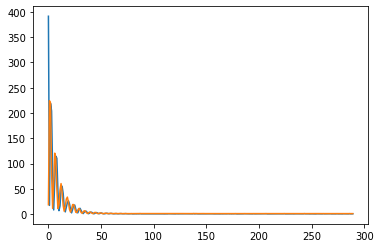

In [147]:
plot_curve(loss)
plot_curve(val_loss)

In [148]:
class Deep_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(11, 1)
         
    def forward(self, x):
      return self.l1(x)

In [149]:
corr = df.corr()
corr = corr["quality"].iloc[:-1]
corr

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
Name: quality, dtype: float64

In [150]:
def concerver_positif(x):
  return x if x>0 else -x

In [151]:
corr_pos = corr.apply(lambda x: x if x>0 else -x)
corr_pos = corr_pos.sort_values(ascending=False)
corr_pos

alcohol                 0.435575
density                 0.307123
chlorides               0.209934
volatile acidity        0.194723
total sulfur dioxide    0.174737
fixed acidity           0.113663
pH                      0.099427
residual sugar          0.097577
sulphates               0.053678
citric acid             0.009209
free sulfur dioxide     0.008158
Name: quality, dtype: float64

In [155]:
df2 = df.drop( corr_pos[corr_pos < 0.010].keys(), axis=1, inplace=False) #Attention au inplace

In [156]:
df2

,fixed acidity,volatile acidity,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,20.7,0.045,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,1.6,0.049,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,6.9,0.050,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,8.5,0.058,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,8.5,0.058,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,1.6,0.039,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,8.0,0.047,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,1.2,0.041,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,1.1,0.022,110.0,0.98869,3.34,0.38,12.8,7


In [189]:
def preprocess(df2):
  arr = np.array(df2)
  X = arr[: ,:-1]
  y = arr[:, -1]
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  train_data = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).float())
  train_loader = DataLoader(dataset=train_data, batch_size=128, shuffle=True)
  X_test = torch.tensor(X_test).float()
  y_test = torch.tensor(y_test).float()
  return  train_loader, X_test, y_test

In [190]:
train_loader, X_test, y_test = preprocess(df2)

class Regression(nn.Module):
    def __init__(self, n_in):
        super().__init__()
        self.l1 = nn.Linear(n_in, 1)
         
    def forward(self, x):
      return self.l1(x)

In [193]:
model = Regression(X_test.shape[1])
opt = torch.optim.Adam(model.parameters() ,lr=1e-1)
mse_loss = nn.MSELoss(reduction='mean')
step = train_step_constructor(model,mse_loss, opt)

loss = []
val_loss = []

for epoch in range(100):
  for cpt, (batch_x, batch_y) in enumerate(train_loader):
    model.train()
    l = step(batch_x, batch_y)
    loss.append(l)
    model.eval()
    p = model(X_test).float()
    eval_loss = mse_loss(p,y_test)
    val_loss.append(eval_loss)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1225])) that is different to the input size (torch.Size([1225, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [194]:
print(loss[-1])
print(val_loss[-1])

0.709102988243103
tensor(1.0234, grad_fn=<MseLossBackward>)


In [196]:
train_loader, X_test, y_test = preprocess(df)
model = Regression(X_test.shape[1])
opt = torch.optim.Adam(model.parameters() ,lr=1e-1)
mse_loss = nn.MSELoss(reduction='mean')
step = train_step_constructor(model,mse_loss, opt)

loss = []
val_loss = []

for epoch in range(100):
  for cpt, (batch_x, batch_y) in enumerate(train_loader):
    model.train()
    l = step(batch_x, batch_y)
    loss.append(l)
    model.eval()
    p = model(X_test).float()
    eval_loss = mse_loss(p,y_test)
    val_loss.append(eval_loss)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1225])) that is different to the input size (torch.Size([1225, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [197]:
print(loss[-1])
print(val_loss[-1])

0.48978111147880554
tensor(1.5848, grad_fn=<MseLossBackward>)
